__Задача 1__

Подбрасываются три игральных кубика. Оцените вероятность того, что сумма значений этих кубиков не будет превышать 10.
_Подсказка_: оценкой вероятности может служить, например, относительная частота при большом числе опытов. Попробуйте реализовать наибольшее число опытов, которое позволяют ваш компьютер и ваше терпение.

In [13]:
import numpy as np

In [14]:
def lt10_frequency(n: int) -> float:
    """a - выпавший результат первого кубика
       b - второго
       c - третьего
    
    :param n: число испытаний
    """
    a = np.random.randint(1, 7, size=n)
    b = np.random.randint(1, 7, size=n)
    c = np.random.randint(1, 7, size=n)
    
    m = ((a + b + c) <= 10).sum()
    
    return m / n

In [15]:
from matplotlib import pyplot as plt
from tqdm.notebook import trange

plt.style.use('seaborn-whitegrid')

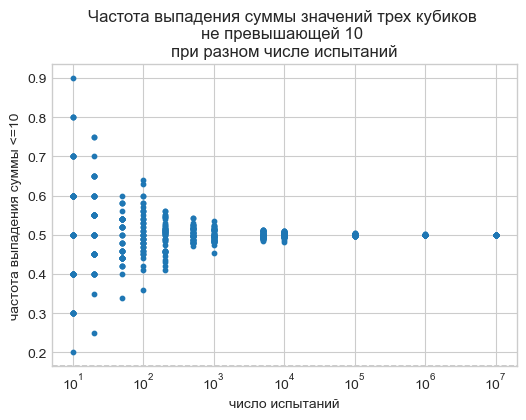

In [17]:
ns = [10, 20, 50, 100, 200, 500, 1000, 5000, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]

x = []
y = []

for _ in trange(50):
    for n in ns:
        x.append(n)
        y.append(lt10_frequency(n))

plt.figure(dpi=100)

plt.scatter(x, y, s=10)
    
plt.axhline(y=1 / 6, c='black', ls='dashed', lw=1).set_zorder(0)
    
plt.xscale('log')

plt.title('Частота выпадения суммы значений трех кубиков \nне превышающей 10 \nпри разном числе испытаний')
plt.xlabel('число испытаний')
plt.ylabel('частота выпадения суммы <=10')

plt.show()

Ответ: 0,5

__Задача 2__

Имеется колода в 52 карты. Найти число возможностей вытянуть из неё 4 карты так, чтобы среди них был хотя бы один туз.

$C_{4}^1 = 4$ - это количество способов, которыми мы можем извлечь одного туза из 4х.

Из оставшихся в колоде 48 карт(4 туза вычитаем из 52) нам нужно выбрать любые три карты. Найдем для этого количество сочетаний:
$$C_{48}^3 = \frac{48!}{3! \: (48 - 3)!} = \frac{48!}{3! \: 45!} = \frac{46 \cdot 47 \cdot 48}{3!} = \frac{46 \cdot 47 \cdot 48}{2 \cdot 3} = 17296$$

In [20]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [23]:
combinations(48, 3)

17296

Общее количество сочетаний будет равно:

In [25]:
_ = combinations(4, 1) * combinations(48, 3)
_

69184

__Задача 3__

Из 60 вопросов, входящих в экзаменационные билеты, студент знает 50. Какова вероятность того, что среди трёх наугад выбранных вопросов студент знает: а) все? б) два?

а) Обозначим событие $A = (вытянул \ все \ три \ выученных \ билета).$


Для начала найдем общее число исходов, т.е. из всех билетов нужно вытянуть три 

$C_{60}^3 = 34220$

In [40]:
combinations(60, 3)

34220

Затем найдем число благоприятных исходов, когда из 50 выученных билетов вытянули 3

$C_{50}^3 = 19600$

In [32]:
combinations(50, 3)

19600

Тогда вероятность будет равна: $$P(A) = \frac{C_{50}^3}{C_{60}^3} = \frac{19600}{34220} = 0.573 $$

б) а) Обозначим событие $B = (вытянул \ два \ выученных \ билета).$


Общее число исходов

$C_{60}^3 = 34220$

Затем найдем число благоприятных исходов, когда из 50 выученных билетов вытянули 2

$C_{50}^2 = 1225$

Из оставшихся 10 билетов вытянуть один:

$C_{10}^1 = 10$



Тогда вероятность будет равна: $$P(B) = \frac{C_{50}^2 \cdot C_{10}^1}{C_{60}^3} = \frac{1225 \cdot 10}{34220} = 0.358 $$

__Задача 4__

Бросается игральная кость. Пусть событие `A` - появление чётного числа, событие `B` - появление числа больше трёх. Являются ли эти события независимыми?

Благоприятными исходами для события `A` будут выпадение 2,4 и 6; для события  `B` - 4, 5 и 6.

$P(A) = 3/6 = 1/2$

$P(B) = 3/6 = 1/2$

$P(AB) = 2/6 = 1/3$ (Случай когда выпадет 4 или 6)

$$P(A|B) = \dfrac{P(AB)}{P(B)} = \dfrac{\frac{1}{3}}{\frac{1}{2}} = \dfrac{2}{3}.$$


Поскольку $P(A|B) \neq P(A)$, заключаем, что события $A$ и $B$ зависимы.




__Задача 5__

Допустим, имеется некоторая очень редкая болезнь (поражает 0.1% населения). Вы приходите к врачу, вам делают тест на эту болезнь, и тест оказывается положительным. Врач говорит вам, что этот тест верно выявляет 99% больных этой болезнью и всего лишь в 1% случаев даёт ложный положительный ответ.

_Вопрос_: какова вероятность, что вы действительно больны ей?

_Подсказка_: используйте формулу Байеса с раскрытием знаменателя с помощью формулы полной вероятности.

Пусть событие $T^+$ - означает положительный тест на болезнь.

Если точность теста 99% тогда вероятность того, что тест даст положительный результат
у больного человека будет равна: $Р(T^+|Б) = \dfrac{99}{100} = 0.99$;

Вероятность того, что тест даст положительный результат у здорового человека:
$Р(T^+|З) = \dfrac{1}{100} = 0.01$

Вероятность заразиться болезнью будет равна: $Р(Б) = \dfrac{0.01}{100} = 0.001$

Вероятность, что человек здоров: $Р(З) = 1 - Р(Б)= 1 - 0.001 = 0.009$

Можем рассчитать полную вероятность того, что тест даст положительный результат, т.к. все события выше 
составляют полную группу событий и они несовместны:

$Р(Т^+) =  Р(T^+|Б) \cdot Р(Б) + Р(T^+|З) \cdot Р(З) = 0.99 \cdot 0.001 + 0.01 \cdot 0.999 = 0.01098$

Нам необходимо найти вероятность того, что тест дал положительный результат (Т+), но человек здоров (З).
Выразим эту вероятность по формуле Байеса
$$P(З|Т+) = \dfrac{P(Т+|З) \cdot P(З)}{P(T+)}=\dfrac{0.01 \cdot 0.999}{0.01098}= 0.91$$
